In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
%matplotlib inline

In [2]:
with open('matrices.pkl', 'rb') as f:
    data = pickle.load(f)

In [3]:
X = list()
y = list()

for i in range(round(len(data))):
    X.append(data[i][0])
    y.append(data[i][1])

In [4]:
#sample random model
model = RandomForestClassifier(n_estimators=100,random_state=1)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1,random_state=5)

In [6]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
            verbose=0, warm_start=False)

In [7]:
predicted = model.predict(X_test)
print("Accuracy",model.score(X_test,y_test))
print("Metrics",metrics.classification_report(predicted,y_test))

0.828422206461


## Brute force of parameters

Trees  10
Score 0.812818363531
Trees  20
Score 0.821007157135
Trees  50
Score 0.827132632665
Trees  70
Score 0.82861564253
Trees  90
Score 0.828422206461
Trees  100
Score 0.828035334322
Trees  150
Score 0.830163131085


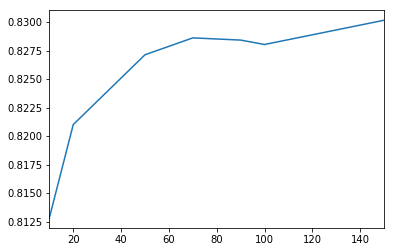

In [8]:
#trees
n_estimators = [10,20,50,70,90,100,150]
results = list()
for trees in n_estimators:
    model = RandomForestClassifier(n_estimators=trees,random_state=5)
    model.fit(X_train,y_train)
    print("Trees ",trees)
    print("Score", model.score(X_test,y_test))
    results.append(model.score(X_test,y_test))  
pd.Series(results,n_estimators).plot()  

Maximum feature sqrt
Score 0.830163131085
Maximum feature log2
Score 0.827068153975


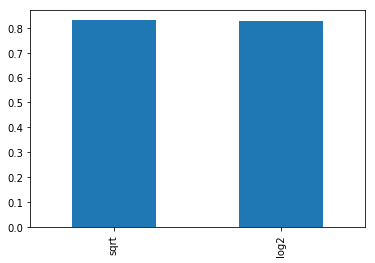

In [9]:
#max_features
max_features = ["sqrt","log2"]
results = list()

for max_f in max_features:
    model = RandomForestClassifier(n_estimators=150, max_features = max_f,random_state=5)
    model.fit(X_train,y_train)
    print("Maximum feature", max_f)
    print("Score",model.score(X_test,y_test))
    results.append(model.score(X_test,y_test))
pd.Series(results,max_features).plot(kind='bar')    

depth  1
Score 0.591591978851
depth  3
Score 0.594493519892
depth  5
Score 0.618544071184
depth  7
Score 0.640015474886
depth  10
Score 0.668579534464
depth  20
Score 0.738732348959
depth  30
Score 0.784447740022
depth  40
Score 0.805596750274
depth  50
Score 0.814494809465
depth  60
Score 0.820297891547
depth  80
Score 0.8256496228
depth  100
Score 0.826036494938


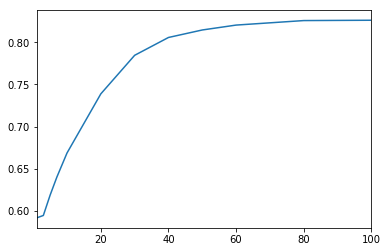

In [10]:
#max_depth
max_depth = [1,3,5,7,10,20,30,40,50,60,80,100]
results = list()

for max_d in max_depth:
    model = RandomForestClassifier(n_estimators=150,max_features="sqrt", max_depth = max_d,random_state = 5)
    model.fit(X_train,y_train)
    print("depth ", max_d)
    print("Score",model.score(X_test,y_test))
    results.append(model.score(X_test,y_test))
pd.Series(results,max_depth).plot()    

Leaf(s) 1
Score 0.8256496228
Leaf(s) 2
Score 0.815913340641
Leaf(s) 3
Score 0.805467792894
Leaf(s) 4
Score 0.799342317364
Leaf(s) 5
Score 0.792249661487


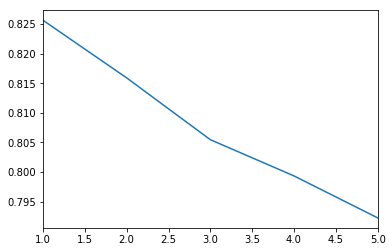

In [11]:
#min_samples_leaf
min_samples_leaf = [1,2,3,4,5]
results = list()
for min_s in min_samples_leaf:
    model = RandomForestClassifier(n_estimators=150,max_features="sqrt",max_depth=80,min_samples_leaf=min_s,random_state=5)
    model.fit(X_train,y_train)
    print("Leaf(s)",min_s)
    print("Score",model.score(X_test,y_test))
    results.append(model.score(X_test,y_test))
pd.Series(results,min_samples_leaf).plot()    

In [34]:
#final model
model = RandomForestClassifier(n_estimators=150,
                               max_features='sqrt',
                               criterion='entropy',
                               max_depth=80,
                               min_samples_leaf=1,
                               random_state=5)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=80, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=5,
            verbose=0, warm_start=False)

In [35]:
predicted = model.predict(X_test)
print("Accuracy",model.score(X_test,y_test))
print("Metrics",metrics.classification_report(predicted,y_test))

Accuracy 0.825789813024
Metrics              precision    recall  f1-score   support

         -1       0.55      0.89      0.68       360
          0       0.92      0.81      0.86      5177
          1       0.72      0.85      0.78      2218

avg / total       0.85      0.83      0.83      7755



In [33]:
predicted = model.predict(X_test)
print("Accuracy",model.score(X_test,y_test))
print("Metrics",metrics.classification_report(predicted,y_test))

Accuracy 0.826047711154
Metrics              precision    recall  f1-score   support

         -1       0.55      0.89      0.68       363
          0       0.92      0.81      0.86      5183
          1       0.72      0.85      0.78      2209

avg / total       0.85      0.83      0.83      7755

